# Time Series Anomaly Detection Exercises
The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.
Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.
The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

In [1]:
# Transform Libraries
import pandas as pd
import numpy as np
import os

#CAT Team Libraries
import env

# Visualization Libraries
import urllib.parse
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

# Misc.  Libraries 
from datetime import datetime
import warnings

In [4]:
def get_logs_data():
    '''Acquire the Curriculum logs from the CodeUp database and preprocess the data.'''
    
    filename = 'curriculum_logs.csv'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # Define SQL query, database parameters, and filename
        sql_query = """
            SELECT l.date, l.time, l.path as lesson, l.user_id, c.name as cohort, c.program_id,
                   l.ip, c.start_date, c.end_date
            FROM logs l
            JOIN cohorts c ON c.id=l.cohort_id;
        """
        # Assuming you have a function named get_db_url that returns the database URL
        url = env.get_db_url('curriculum_logs')
        
        # Read SQL query result into a DataFrame
        logs_df = pd.read_sql(sql_query, url)
        
        # Define program mapping
        program_mapping = {1: 'web dev', 2: 'web dev', 3: 'data science', 4: 'frontend'}
        
        # Replace program_id with corresponding program names
        logs_df['program'] = logs_df['program_id'].replace(program_mapping)
        
        # Save the DataFrame as a CSV file
        logs_df.to_csv(filename, index=False)
        
        return logs_df


In [6]:
logs_df = get_logs_data()
logs_df.head()

,date,time,lesson,user_id,cohort,program_id,ip,start_date,end_date,program
0,2018-01-26,09:55:03,/,1,Hampton,1,97.105.19.61,2015-09-22,2016-02-06,web dev
1,2018-01-26,09:56:02,java-ii,1,Hampton,1,97.105.19.61,2015-09-22,2016-02-06,web dev
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,Hampton,1,97.105.19.61,2015-09-22,2016-02-06,web dev
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,Hampton,1,97.105.19.61,2015-09-22,2016-02-06,web dev
4,2018-01-26,09:56:24,javascript-i/conditionals,2,Teddy,2,97.105.19.61,2018-01-08,2018-05-17,web dev


In [7]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        847330 non-null  object
 1   time        847330 non-null  object
 2   lesson      847329 non-null  object
 3   user_id     847330 non-null  int64 
 4   cohort      847330 non-null  object
 5   program_id  847330 non-null  int64 
 6   ip          847330 non-null  object
 7   start_date  847330 non-null  object
 8   end_date    847330 non-null  object
 9   program     847330 non-null  object
dtypes: int64(2), object(8)
memory usage: 64.6+ MB


In [8]:
logs_df.date = pd.to_datetime(logs_df.date)
logs_df = logs_df.set_index(logs_df.date)
date = logs_df['date'].resample('d').count()
date

date
2018-01-26     533
2018-01-27     230
2018-01-28     168
2018-01-29     783
2018-01-30     614
              ... 
2021-04-17     430
2021-04-18     651
2021-04-19    2156
2021-04-20    1921
2021-04-21    1107
Freq: D, Name: date, Length: 1182, dtype: int64

In [9]:
logs_df.start_date = pd.to_datetime(logs_df.start_date)
logs_df = logs_df.set_index(logs_df.start_date)
start_date = logs_df['start_date'].resample('d').count()
start_date

start_date
2014-02-04    92921
2014-02-05        0
2014-02-06        0
2014-02-07        0
2014-02-08        0
              ...  
2021-04-08        0
2021-04-09        0
2021-04-10        0
2021-04-11        0
2021-04-12     1672
Freq: D, Name: start_date, Length: 2625, dtype: int64

In [10]:
logs_df.end_date = pd.to_datetime(logs_df.end_date)
logs_df = logs_df.set_index(logs_df.end_date)
end_date = logs_df['end_date'].resample('d').count()
end_date

end_date
2014-02-04    84031
2014-02-05        0
2014-02-06        0
2014-02-07        0
2014-02-08        0
              ...  
2021-09-27        0
2021-09-28        0
2021-09-29        0
2021-09-30        0
2021-10-01     1672
Freq: D, Name: end_date, Length: 2797, dtype: int64

In [11]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2016-02-06 to 2014-02-04
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        847330 non-null  datetime64[ns]
 1   time        847330 non-null  object        
 2   lesson      847329 non-null  object        
 3   user_id     847330 non-null  int64         
 4   cohort      847330 non-null  object        
 5   program_id  847330 non-null  int64         
 6   ip          847330 non-null  object        
 7   start_date  847330 non-null  datetime64[ns]
 8   end_date    847330 non-null  datetime64[ns]
 9   program     847330 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(5)
memory usage: 71.1+ MB


<Axes: xlabel='date'>

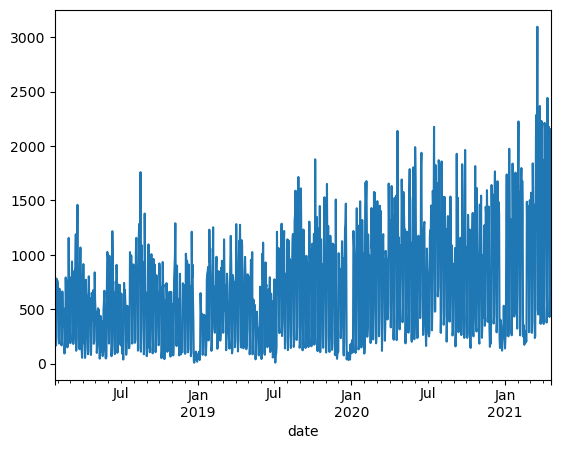

In [12]:
date.plot()

<Axes: xlabel='start_date'>

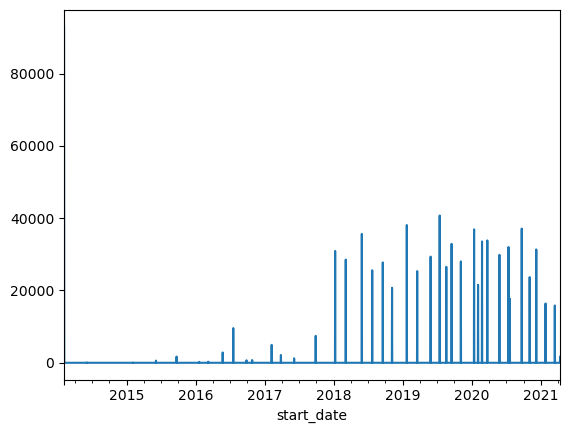

In [13]:
start_date.plot()

<Axes: xlabel='end_date'>

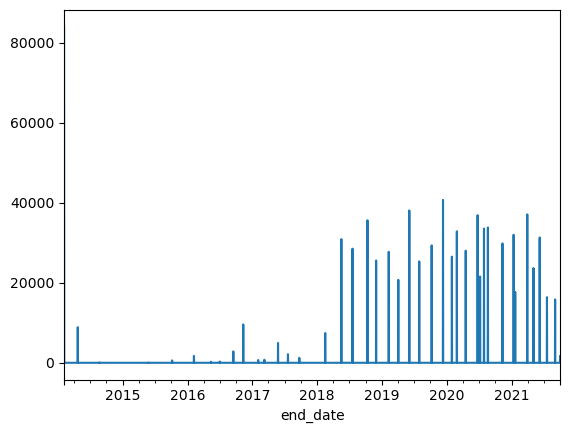

In [14]:
end_date.plot()

1. Label students by the program they are in.

In [15]:
student_by_program = logs_df.groupby('user_id')[['program']].nunique()
student_by_program = student_by_program.sort_values(by='program', ascending=False)
student_by_program

,program
user_id,
268,2
143,2
895,2
581,2
480,2
...,...
331,1
332,1
333,1


2. Is it possible to identify the user_id of a staff member?

In [16]:
# Filter out 'Staff' cohorts
staff_data = logs_df[logs_df['cohort'] == 'Staff']

# Create a new DataFrame with the desired columns
staff_id = staff_data.rename(columns={'cohort': 'staff', 'user_id': 'staff_id'})[['staff', 'staff_id']]

staff_id

,staff,staff_id
end_date,,
2014-02-04,Staff,53
2014-02-04,Staff,314
2014-02-04,Staff,314
2014-02-04,Staff,40
2014-02-04,Staff,40
...,...,...
2014-02-04,Staff,64
2014-02-04,Staff,64
2014-02-04,Staff,64


3. Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [17]:

# Filter out rows where 'date' access_day is beyond 'end_date' graduation
grad_access = logs_df[logs_df.index.date > logs_df['end_date']]

# Group by access_day and count unique user_ids
grad_access_count = grad_access.groupby(grad_access.index.date)['user_id'].nunique()

# Convert the grad count from Series to a DataFrame
grad_access_count_df = grad_access_count.reset_index()
grad_access_count_df.columns = ['access_day', 'unique_users_count']
grad_access_count_df.head(10)

,access_day,unique_users_count


4. Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2. 

5. Plot the access activity of these students.

Empty DataFrame
Columns: [date, time, lesson, user_id, cohort, program_id, ip, start_date, end_date, program, rolling_mean, rolling_std, upper_band, lower_band]
Index: []


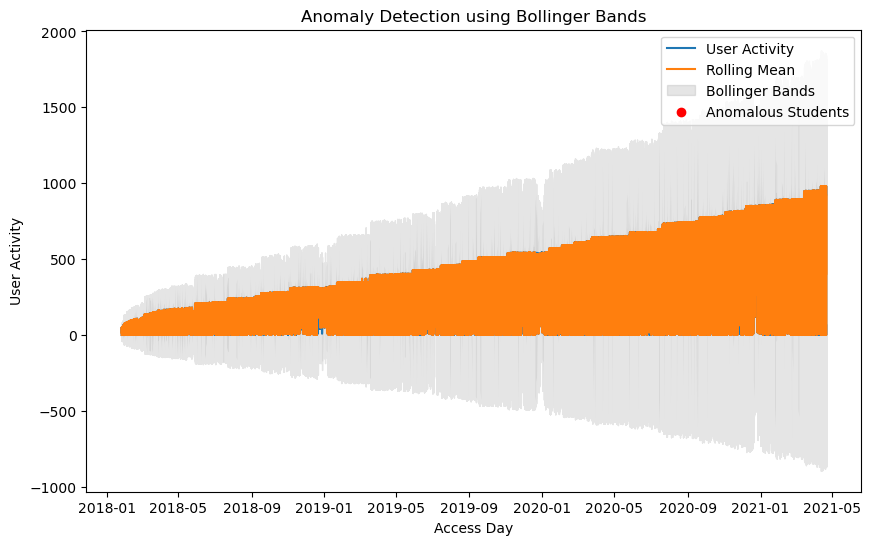

In [18]:
# Calculate rolling mean and standard deviation
rolling_window = 2  # Set the rolling window size
logs_df['rolling_mean'] = logs_df['user_id'].rolling(window=rolling_window).mean()
logs_df['rolling_std'] = logs_df['user_id'].rolling(window=rolling_window).std()

# Calculate upper and lower bands
logs_df['upper_band'] = logs_df['rolling_mean'] + 2 * logs_df['rolling_std']
logs_df['lower_band'] = logs_df['rolling_mean'] - 2 * logs_df['rolling_std']

# Identify anomalous students
anomalous_students = logs_df[(logs_df['user_id'] > logs_df['upper_band']) | (logs_df['user_id'] < logs_df['lower_band'])]

# Print or analyze the anomalous students
print(anomalous_students)

# Plot the data and bands for visualization
plt.figure(figsize=(10, 6))
plt.plot(logs_df['date'], logs_df['user_id'], label='User Activity')
plt.plot(logs_df['date'], logs_df['rolling_mean'], label='Rolling Mean')
plt.fill_between(logs_df['date'], logs_df['lower_band'], logs_df['upper_band'], color='gray', alpha=0.2, label='Bollinger Bands')
plt.scatter(anomalous_students['date'], anomalous_students['user_id'], color='red', label='Anomalous Students')
plt.legend()
plt.xlabel('Access Day')
plt.ylabel('User Activity')
plt.title('Anomaly Detection using Bollinger Bands')
plt.show()
